In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
import os
import textwrap
import seaborn as sns
import matplotlib

plt.rcParams.update(matplotlib.rcParamsDefault)
COLORS = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897', '#f6bd60', '#e76f51', '#2a9d8f', "#c77dff", "#f7d6e0"]

semi_balck = '#4F6272'  #%%
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
import os
import textwrap
import seaborn as sns
import matplotlib

plt.rcParams.update(matplotlib.rcParamsDefault)
COLORS = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897', '#f6bd60', '#e76f51', '#2a9d8f', "#c77dff", "#f7d6e0"]

semi_balck = '#4F6272'

In [4]:
results_path = "/Volumes/noamaz/modularity/"
local_base_path = '/Users/noamazmon/PycharmProjects/network_modularity'

time_str = dt.now().strftime("%Y-%m-%d-%H-%M-%S")

plot_path = f"{local_base_path}/plots/all_togther"

In [5]:
task = "retina_xor"
num_layers = '3'
retina_res_folder = f"{task}/retina_{num_layers}_layers"
retina_lgbm_folder_name = 'exp_2023-11-27-15-51-15_nice_features'
retina_lgb_res_path = f"{results_path}/{retina_res_folder}/lightgbm_feature_selection/{retina_lgbm_folder_name}"
retina_lgb_res_nn_path = f"{retina_lgb_res_path}/teach_archs_regression_feature_selection_results"
retina_correlated_features_csv_name = "2023-11-28-13-17-26_feature_correlation.csv"


In [6]:
retina_correlated_features = pd.read_csv(
    f"{results_path}/{retina_res_folder}/feature_correlation/{retina_correlated_features_csv_name}",
    index_col=0)

In [6]:
retina_feature_selection_res = pd.DataFrame()
for file_name in os.listdir(retina_lgb_res_nn_path):
    if 'best.csv' not in file_name:
        continue
    temp = pd.read_csv(f"{retina_lgb_res_nn_path}/{file_name}")
    temp['num_features'] = int(file_name.split('only_')[1].split('_features')[0])
    retina_feature_selection_res = pd.concat([retina_feature_selection_res, temp], ignore_index=True)
retina_feature_selection_res = retina_feature_selection_res.sort_values('num_features')

In [7]:
for file_name in os.listdir(retina_lgb_res_nn_path):
    if 'best.csv' not in file_name:
        continue
    if 'only_6' in file_name:
        temp = pd.read_csv(f"{retina_lgb_res_nn_path}/{file_name}")
        break

In [8]:
model_res_path = f"{results_path}/{retina_res_folder}/lightgbm_feature_selection/{retina_lgbm_folder_name}/6_prediction_results.csv"
model_prediction_res = pd.read_csv(model_res_path)
model_prediction_res

,Unnamed: 0,test_pred,test_label
0,0,0.885750,0.908542
1,1,0.933482,0.955677
2,2,0.965134,0.970833
3,3,0.901420,0.850990
4,4,0.906217,0.963125
...,...,...,...
4978,4978,0.894699,0.951667
4979,4979,0.904932,0.963125
4980,4980,0.934680,0.929688
4981,4981,0.966546,0.975990


In [9]:
task = "xor"
num_layers = "4"
xor_res_folder = f"{task}/{task}_{num_layers}_layers"
xor_lgbm_folder_name = 'exp_2023-11-16-17-38-02_nice_features'
xor_lgb_res_path = f"{results_path}/{xor_res_folder}/lightgbm_feature_selection/{xor_lgbm_folder_name}"
xor_lgb_res_nn_path = f"{xor_lgb_res_path}/teach_archs_regression_feature_selection_results"
xor_correlated_features_csv_name = "2023-11-17-11-50-45_feature_correlation.csv"


In [10]:
xor_correlated_features = pd.read_csv(
    f"{results_path}/{xor_res_folder}/feature_correlation/{xor_correlated_features_csv_name}",
    index_col=0)

In [11]:
xor_feature_selection_res = pd.DataFrame()
for file_name in os.listdir(xor_lgb_res_nn_path):
    if 'best.csv' not in file_name:
        continue
    temp = pd.read_csv(f"{xor_lgb_res_nn_path}/{file_name}")
    temp['num_features'] = int(file_name.split('only_')[1].split('_features')[0])
    xor_feature_selection_res = pd.concat([xor_feature_selection_res, temp], ignore_index=True)
xor_feature_selection_res = xor_feature_selection_res.sort_values('num_features')

In [12]:
task = "digits"
num_layers = '3'
digit_res_folder = f"{task}/digits_{num_layers}_layers"
digit_lgbm_folder_name = 'exp_2023_11_27_11_00_0_nice_features'
digit_lgb_res_path = f"{results_path}/{digit_res_folder}/lightgbm_feature_selection/{digit_lgbm_folder_name}"
digit_lgb_res_nn_path = f"{digit_lgb_res_path}/teach_archs_regression_feature_selection_results"
dig_correlated_features_csv_name = "2023-11-28-12-45-38_feature_correlation.csv"

In [13]:
dig_correlated_features = pd.read_csv(
    f"{results_path}/{digit_res_folder}/feature_correlation/{dig_correlated_features_csv_name}",
    index_col=0)

In [14]:
digit_feature_selection_res = pd.DataFrame()
for file_name in os.listdir(digit_lgb_res_nn_path):
    if 'best.csv' not in file_name:
        continue
    temp = pd.read_csv(f"{digit_lgb_res_nn_path}/{file_name}")
    temp['num_features'] = int(file_name.split('only_')[1].split('_features')[0])
    digit_feature_selection_res = pd.concat([digit_feature_selection_res, temp], ignore_index=True)
digit_feature_selection_res = digit_feature_selection_res.sort_values('num_features')

In [15]:
retina_mapes = retina_feature_selection_res['best mape test'][
    retina_feature_selection_res['num_features'] <= 20].to_list()
retina_diffs = [(retina_mapes[i] - retina_mapes[i + 1]) * 100 for i in range(len(retina_mapes) - 1)]

In [16]:
xor_mapes = xor_feature_selection_res['best mape test'][xor_feature_selection_res['num_features'] <= 20].to_list()[1:]
xor_num_features = xor_feature_selection_res['num_features'][xor_feature_selection_res['num_features'] <= 20].to_list()[
                   1:]
xor_diffs = [(xor_mapes[i] - xor_mapes[i + 1]) * 100 for i in range(len(xor_mapes) - 1)]

In [17]:
mapes = digit_feature_selection_res['best mape test'][digit_feature_selection_res['num_features'] <= 20].to_list()[1:]
dig_num_features = digit_feature_selection_res['num_features'][
                       digit_feature_selection_res['num_features'] <= 20].to_list()[1:]
digit_diffs = [(mapes[i] - mapes[i + 1]) * 100 for i in range(len(mapes) - 1)]

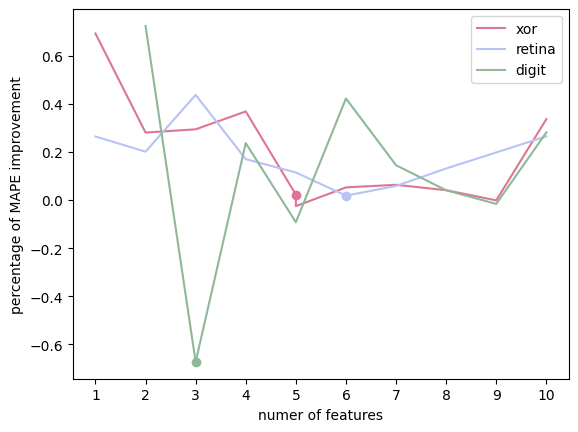

In [18]:
plt.figure()
plt.plot(xor_feature_selection_res['num_features'][xor_feature_selection_res['num_features'] <= 20].iloc[1:-1],
         xor_diffs, label='xor', c=COLORS[2])
plt.scatter(5, xor_diffs[4], c=COLORS[2])
plt.plot(retina_feature_selection_res['num_features'][retina_feature_selection_res['num_features'] <= 20].iloc[:-1],
         retina_diffs, label='retina', c=COLORS[1])
plt.scatter(6, retina_diffs[5], c=COLORS[1])
plt.plot(digit_feature_selection_res['num_features'][digit_feature_selection_res['num_features'] <= 20].iloc[1:-1],
         digit_diffs, label='digit', c=COLORS[3])
plt.scatter(3, digit_diffs[1], c=COLORS[3], )

plt.legend()
plt.ylabel('percentage of MAPE improvement')
plt.xlabel('numer of features')
plt.xticks(range(1, 11))
plt.savefig(
    f"{plot_path}/{time_str}_choosing_number_of_features.png")
plt.show()

In [19]:
retina_feature_selection_res.iloc[5]

Unnamed: 0           0.000000
best ephoc         457.000000
best mape train      0.016752
best mape test       0.017062
best mse train       0.000022
best mse test        0.000023
best r2 train        0.752990
best r2 test         0.743534
num_features         6.000000
Name: 9, dtype: float64

ValueError: too many values to unpack (expected 2)

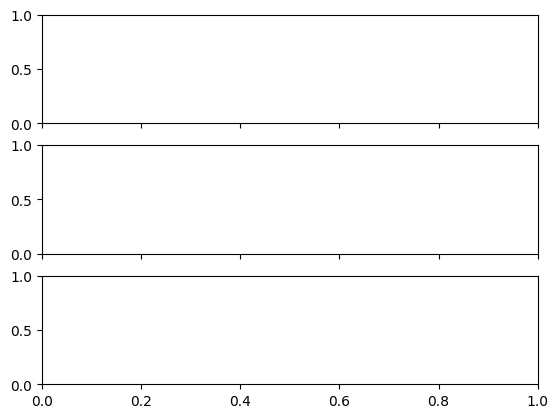

In [20]:
f, axs = plt.subplots(3, 1, sharex='all')
for i, (correlated_features, name) in enumerate(zip(
        [retina_correlated_features, xor_correlated_features, dig_correlated_features],
        ['retina', 'xor', 'digits'],
        [COLORS[2], COLORS[1], COLORS[3]],
)):
    corr_vals = np.tril(correlated_features, k=-1).flatten()
    corr_vals = corr_vals[corr_vals != 0]
    axs[i].hist(corr_vals, density=True, bins=40, alpha=0.5)
    textstr = f"quantile 95 threshold: {round(np.quantile(corr_vals, 0.95), 3)}"
    axs[i].text(0.05, 0.95, textstr, transform=axs[i].transAxes, fontsize=10, verticalalignment='top', )
    axs[i].set_title(name)
    axs[i].set_ylable(name)

In [ ]:
for feature_idx in [2, ]:
    print(len(np.where(np.array(dig_correlated_features)[feature_idx] >= 0.75)[0]))

In [ ]:
selected_feature_names = ['max_possible_connections', 'max_connectivity_between_layers_per_layer_2', 'motifs_count_1']
selected_features_idxs = [
    dig_correlated_features.columns.to_list().index(feature)
    for feature in selected_feature_names
]
for feature_idx in selected_features_idxs:
    print(len(np.where(np.array(dig_correlated_features)[feature_idx] >= 0.90)[0]))


In [ ]:
corr_array = np.array(dig_correlated_features)
for feature_idx in selected_features_idxs:
    print(len(np.where(corr_array[feature_idx] >= np.quantile(corr_array, 0.95))[0]))

In [7]:
results_path = "/Volumes/noamaz/modularity/"
local_base_path = '/Users/noamazmon/PycharmProjects/network_modularity'

time_str = dt.now().strftime("%Y-%m-%d-%H-%M-%S")

plot_path = f"{local_base_path}/plots/all_togther"

In [8]:
task = "retina_xor"
num_layers = '3'
retina_res_folder = f"{task}/retina_{num_layers}_layers"
retina_lgbm_folder_name = 'exp_2023-11-27-15-51-15_nice_features'
retina_lgb_res_path = f"{results_path}/{retina_res_folder}/lightgbm_feature_selection/{retina_lgbm_folder_name}"
retina_lgb_res_nn_path = f"{retina_lgb_res_path}/teach_archs_regression_feature_selection_results"
retina_correlated_features_csv_name = "2023-11-28-13-17-26_feature_correlation.csv"


In [9]:
retina_correlated_features = pd.read_csv(
    f"{results_path}/{retina_res_folder}/feature_correlation/{retina_correlated_features_csv_name}",
    index_col=0)

In [10]:
retina_feature_selection_res = pd.DataFrame()
for file_name in os.listdir(retina_lgb_res_nn_path):
    if 'best.csv' not in file_name:
        continue
    temp = pd.read_csv(f"{retina_lgb_res_nn_path}/{file_name}")
    temp['num_features'] = int(file_name.split('only_')[1].split('_features')[0])
    retina_feature_selection_res = pd.concat([retina_feature_selection_res, temp], ignore_index=True)
retina_feature_selection_res = retina_feature_selection_res.sort_values('num_features')

In [11]:
for file_name in os.listdir(retina_lgb_res_nn_path):
    if 'best.csv' not in file_name:
        continue
    if 'only_6' in file_name:
        temp = pd.read_csv(f"{retina_lgb_res_nn_path}/{file_name}")
        break

In [12]:
model_res_path = f"{results_path}/{retina_res_folder}/lightgbm_feature_selection/{retina_lgbm_folder_name}/6_prediction_results.csv"
model_prediction_res = pd.read_csv(model_res_path)
model_prediction_res

,Unnamed: 0,test_pred,test_label
0,0,0.885750,0.908542
1,1,0.933482,0.955677
2,2,0.965134,0.970833
3,3,0.901420,0.850990
4,4,0.906217,0.963125
...,...,...,...
4978,4978,0.894699,0.951667
4979,4979,0.904932,0.963125
4980,4980,0.934680,0.929688
4981,4981,0.966546,0.975990


In [13]:
task = "xor"
num_layers = "4"
xor_res_folder = f"{task}/{task}_{num_layers}_layers"
xor_lgbm_folder_name = 'exp_2023-11-16-17-38-02_nice_features'
xor_lgb_res_path = f"{results_path}/{xor_res_folder}/lightgbm_feature_selection/{xor_lgbm_folder_name}"
xor_lgb_res_nn_path = f"{xor_lgb_res_path}/teach_archs_regression_feature_selection_results"
xor_correlated_features_csv_name = "2023-11-17-11-50-45_feature_correlation.csv"


In [14]:
xor_correlated_features = pd.read_csv(
    f"{results_path}/{xor_res_folder}/feature_correlation/{xor_correlated_features_csv_name}",
    index_col=0)

In [15]:
xor_feature_selection_res = pd.DataFrame()
for file_name in os.listdir(xor_lgb_res_nn_path):
    if 'best.csv' not in file_name:
        continue
    temp = pd.read_csv(f"{xor_lgb_res_nn_path}/{file_name}")
    temp['num_features'] = int(file_name.split('only_')[1].split('_features')[0])
    xor_feature_selection_res = pd.concat([xor_feature_selection_res, temp], ignore_index=True)
xor_feature_selection_res = xor_feature_selection_res.sort_values('num_features')

In [16]:
task = "digits"
num_layers = '3'
digit_res_folder = f"{task}/digits_{num_layers}_layers"
digit_lgbm_folder_name = 'exp_2023_11_27_11_00_0_nice_features'
digit_lgb_res_path = f"{results_path}/{digit_res_folder}/lightgbm_feature_selection/{digit_lgbm_folder_name}"
digit_lgb_res_nn_path = f"{digit_lgb_res_path}/teach_archs_regression_feature_selection_results"
dig_correlated_features_csv_name = "2023-11-28-12-45-38_feature_correlation.csv"

In [17]:
dig_correlated_features = pd.read_csv(
    f"{results_path}/{digit_res_folder}/feature_correlation/{dig_correlated_features_csv_name}",
    index_col=0)

In [18]:
digit_feature_selection_res = pd.DataFrame()
for file_name in os.listdir(digit_lgb_res_nn_path):
    if 'best.csv' not in file_name:
        continue
    temp = pd.read_csv(f"{digit_lgb_res_nn_path}/{file_name}")
    temp['num_features'] = int(file_name.split('only_')[1].split('_features')[0])
    digit_feature_selection_res = pd.concat([digit_feature_selection_res, temp], ignore_index=True)
digit_feature_selection_res = digit_feature_selection_res.sort_values('num_features')

In [19]:
retina_mapes = retina_feature_selection_res['best mape test'][
    retina_feature_selection_res['num_features'] <= 20].to_list()
retina_diffs = [(retina_mapes[i] - retina_mapes[i + 1]) * 100 for i in range(len(retina_mapes) - 1)]

In [20]:
xor_mapes = xor_feature_selection_res['best mape test'][xor_feature_selection_res['num_features'] <= 20].to_list()[1:]
xor_num_features = xor_feature_selection_res['num_features'][xor_feature_selection_res['num_features'] <= 20].to_list()[
                   1:]
xor_diffs = [(xor_mapes[i] - xor_mapes[i + 1]) * 100 for i in range(len(xor_mapes) - 1)]

In [21]:
mapes = digit_feature_selection_res['best mape test'][digit_feature_selection_res['num_features'] <= 20].to_list()[1:]
dig_num_features = digit_feature_selection_res['num_features'][
                       digit_feature_selection_res['num_features'] <= 20].to_list()[1:]
digit_diffs = [(mapes[i] - mapes[i + 1]) * 100 for i in range(len(mapes) - 1)]

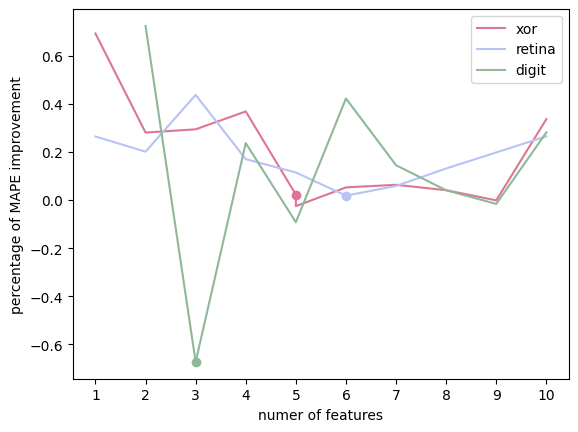

In [30]:
plt.figure()
plt.plot(xor_feature_selection_res['num_features'][xor_feature_selection_res['num_features'] <= 20].iloc[1:-1],
         xor_diffs, label='xor', c=COLORS[2])
plt.scatter(5, xor_diffs[4], c=COLORS[2])
plt.plot(retina_feature_selection_res['num_features'][retina_feature_selection_res['num_features'] <= 20].iloc[:-1],
         retina_diffs, label='retina', c=COLORS[1])
plt.scatter(6, retina_diffs[5], c=COLORS[1])
plt.plot(digit_feature_selection_res['num_features'][digit_feature_selection_res['num_features'] <= 20].iloc[1:-1],
         digit_diffs, label='digit', c=COLORS[3])
plt.scatter(3, digit_diffs[1], c=COLORS[3], )

plt.legend()
plt.ylabel('percentage of MAPE improvement')
plt.xlabel('numer of features')
plt.xticks(range(1, 11))
plt.savefig(
    f"{plot_path}/{time_str}_choosing_number_of_features.png")
plt.show()

In [31]:
retina_feature_selection_res.iloc[5]

Unnamed: 0           0.000000
best ephoc         457.000000
best mape train      0.016752
best mape test       0.017062
best mse train       0.000022
best mse test        0.000023
best r2 train        0.752990
best r2 test         0.743534
num_features         6.000000
Name: 9, dtype: float64

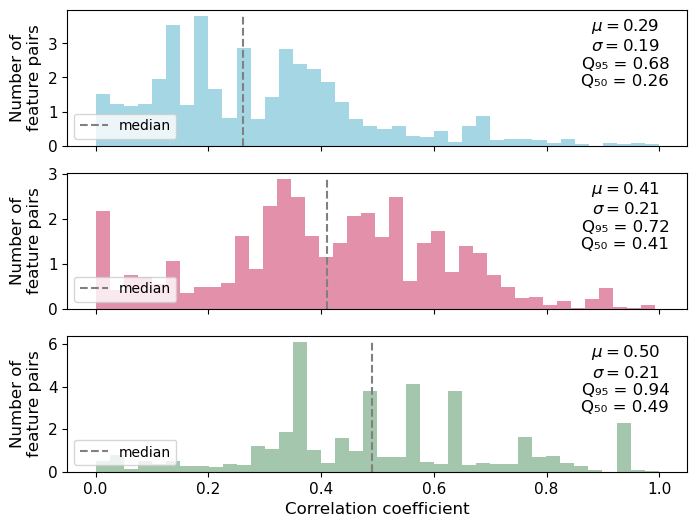

In [27]:
s = ['A', 'B', 'C']
f, axs = plt.subplots(3, 1, sharex='all', figsize=(8, 6))

for i, (correlated_features, name, c) in enumerate(zip(
        [retina_correlated_features, xor_correlated_features, dig_correlated_features],
        ['Retina', 'XOR', 'Digit recognition'],
        ["#8ECDDD", COLORS[2], COLORS[3]],
)):
    corr_vals = np.tril(correlated_features, k=-1).flatten()
    corr_vals = corr_vals[corr_vals != 0]
    n, _, _ = axs[i].hist(corr_vals, density=True, bins=40, alpha=0.8, color=c)
    quent_threshold = round(np.quantile(corr_vals, 0.95), 2)
    axs[i].vlines(x=np.median(corr_vals), ymin=0, ymax=max(n), colors='grey', linestyles='--', label=f"median")
    textstr = '\n'.join((
        r'$\mu=%.2f$' % (np.mean(corr_vals),),
        r'$\sigma=%.2f$' % (np.std(corr_vals),),
        f"Q\u2089\u2085 = {quent_threshold}",
        f"Q\u2085\u2080 = {round(np.median(corr_vals),2)}",
    ))
    axs[i].text(0.90, 0.95, textstr, transform=axs[i].transAxes, fontsize=12, verticalalignment='top', horizontalalignment = 'center')
    #axs[i].text(-0.15, 0.98, s[i], transform=axs[i].transAxes, fontsize=14, verticalalignment='top', weight="bold")
    #axs[i].set_title(name)
    axs[i].legend(loc='lower left')
    axs[i].set_ylabel('Number of\nfeature pairs', fontsize=12,)
    axs[i].tick_params(axis='both', labelsize=11)
f.align_ylabels(axs[:])

axs[2].set_xlabel('Correlation coefficient',  fontsize=12,)
#plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_corr_coeffs_.png", bbox_inches='tight')
plt.show()

In [33]:
for feature_idx in [2, ]:
    print(len(np.where(np.array(dig_correlated_features)[feature_idx] >= 0.75)[0]))

2


In [31]:
NICE_FEATURES = [
    'connectivity_ratio',
    'num_connections',
    'max_possible_connections',
    'out_connections_per_layer',
    'in_connections_per_layer',
    'total_connectivity_ratio_between_layers',
    'max_connectivity_between_layers_per_layer',
    'layer_connectivity_rank',
    'distances_between_input_neuron',
    'num_paths_to_output_per_input_neuron',
    'num_involved_neurons_in_paths_per_input_neuron',
    'motifs_count',
    'dimensions',
    'num_layers',
    'num_neurons'
]


In [32]:
max_n = 5
for c in sorted(xor_correlated_features.columns):
    if 'connections_per' not in c:
        continue
    n = int(c.rstrip(' ')[-2])
    if 'connections_per_layer_(0' in c:
        max_n = 5
        c = c.split('(0')[0] + str(n)
    else:
        if 'connections_per_layer_(1' in c:
            c = c.split('(1')[0] + str(max_n + 1)
        if 'connections_per_layer_(2' in c:
            c = c.split('(2')[0] + str(max_n + 1)
        if 'connections_per_layer_(3' in c:
            c = c.split('(3')[0] + str(max_n + 1)
        max_n += 1
    print(c)

in_connections_per_layer_6
in_connections_per_layer_7
in_connections_per_layer_8
in_connections_per_layer_9
in_connections_per_layer_10
in_connections_per_layer_11
in_connections_per_layer_12
in_connections_per_layer_13
in_connections_per_layer_14
in_connections_per_layer_15
in_connections_per_layer_16
in_connections_per_layer_17
in_connections_per_layer_18
in_connections_per_layer_19
in_connections_per_layer_(4_ 0) 
in_connections_per_layer_(4_ 1) 
out_connections_per_layer_0
out_connections_per_layer_1
out_connections_per_layer_2
out_connections_per_layer_3
out_connections_per_layer_4
out_connections_per_layer_5
out_connections_per_layer_6
out_connections_per_layer_7
out_connections_per_layer_8
out_connections_per_layer_9
out_connections_per_layer_10
out_connections_per_layer_11
out_connections_per_layer_12
out_connections_per_layer_13
out_connections_per_layer_14
out_connections_per_layer_15
out_connections_per_layer_16
out_connections_per_layer_17
out_connections_per_layer_18
out_c

In [33]:
sorted(xor_feature_selection_res.columns)

['Unnamed: 0',
 'best ephoc',
 'best mape test',
 'best mape train',
 'best mse test',
 'best mse train',
 'best r2 test',
 'best r2 train',
 'num_features']

<Figure size 2600x2400 with 0 Axes>

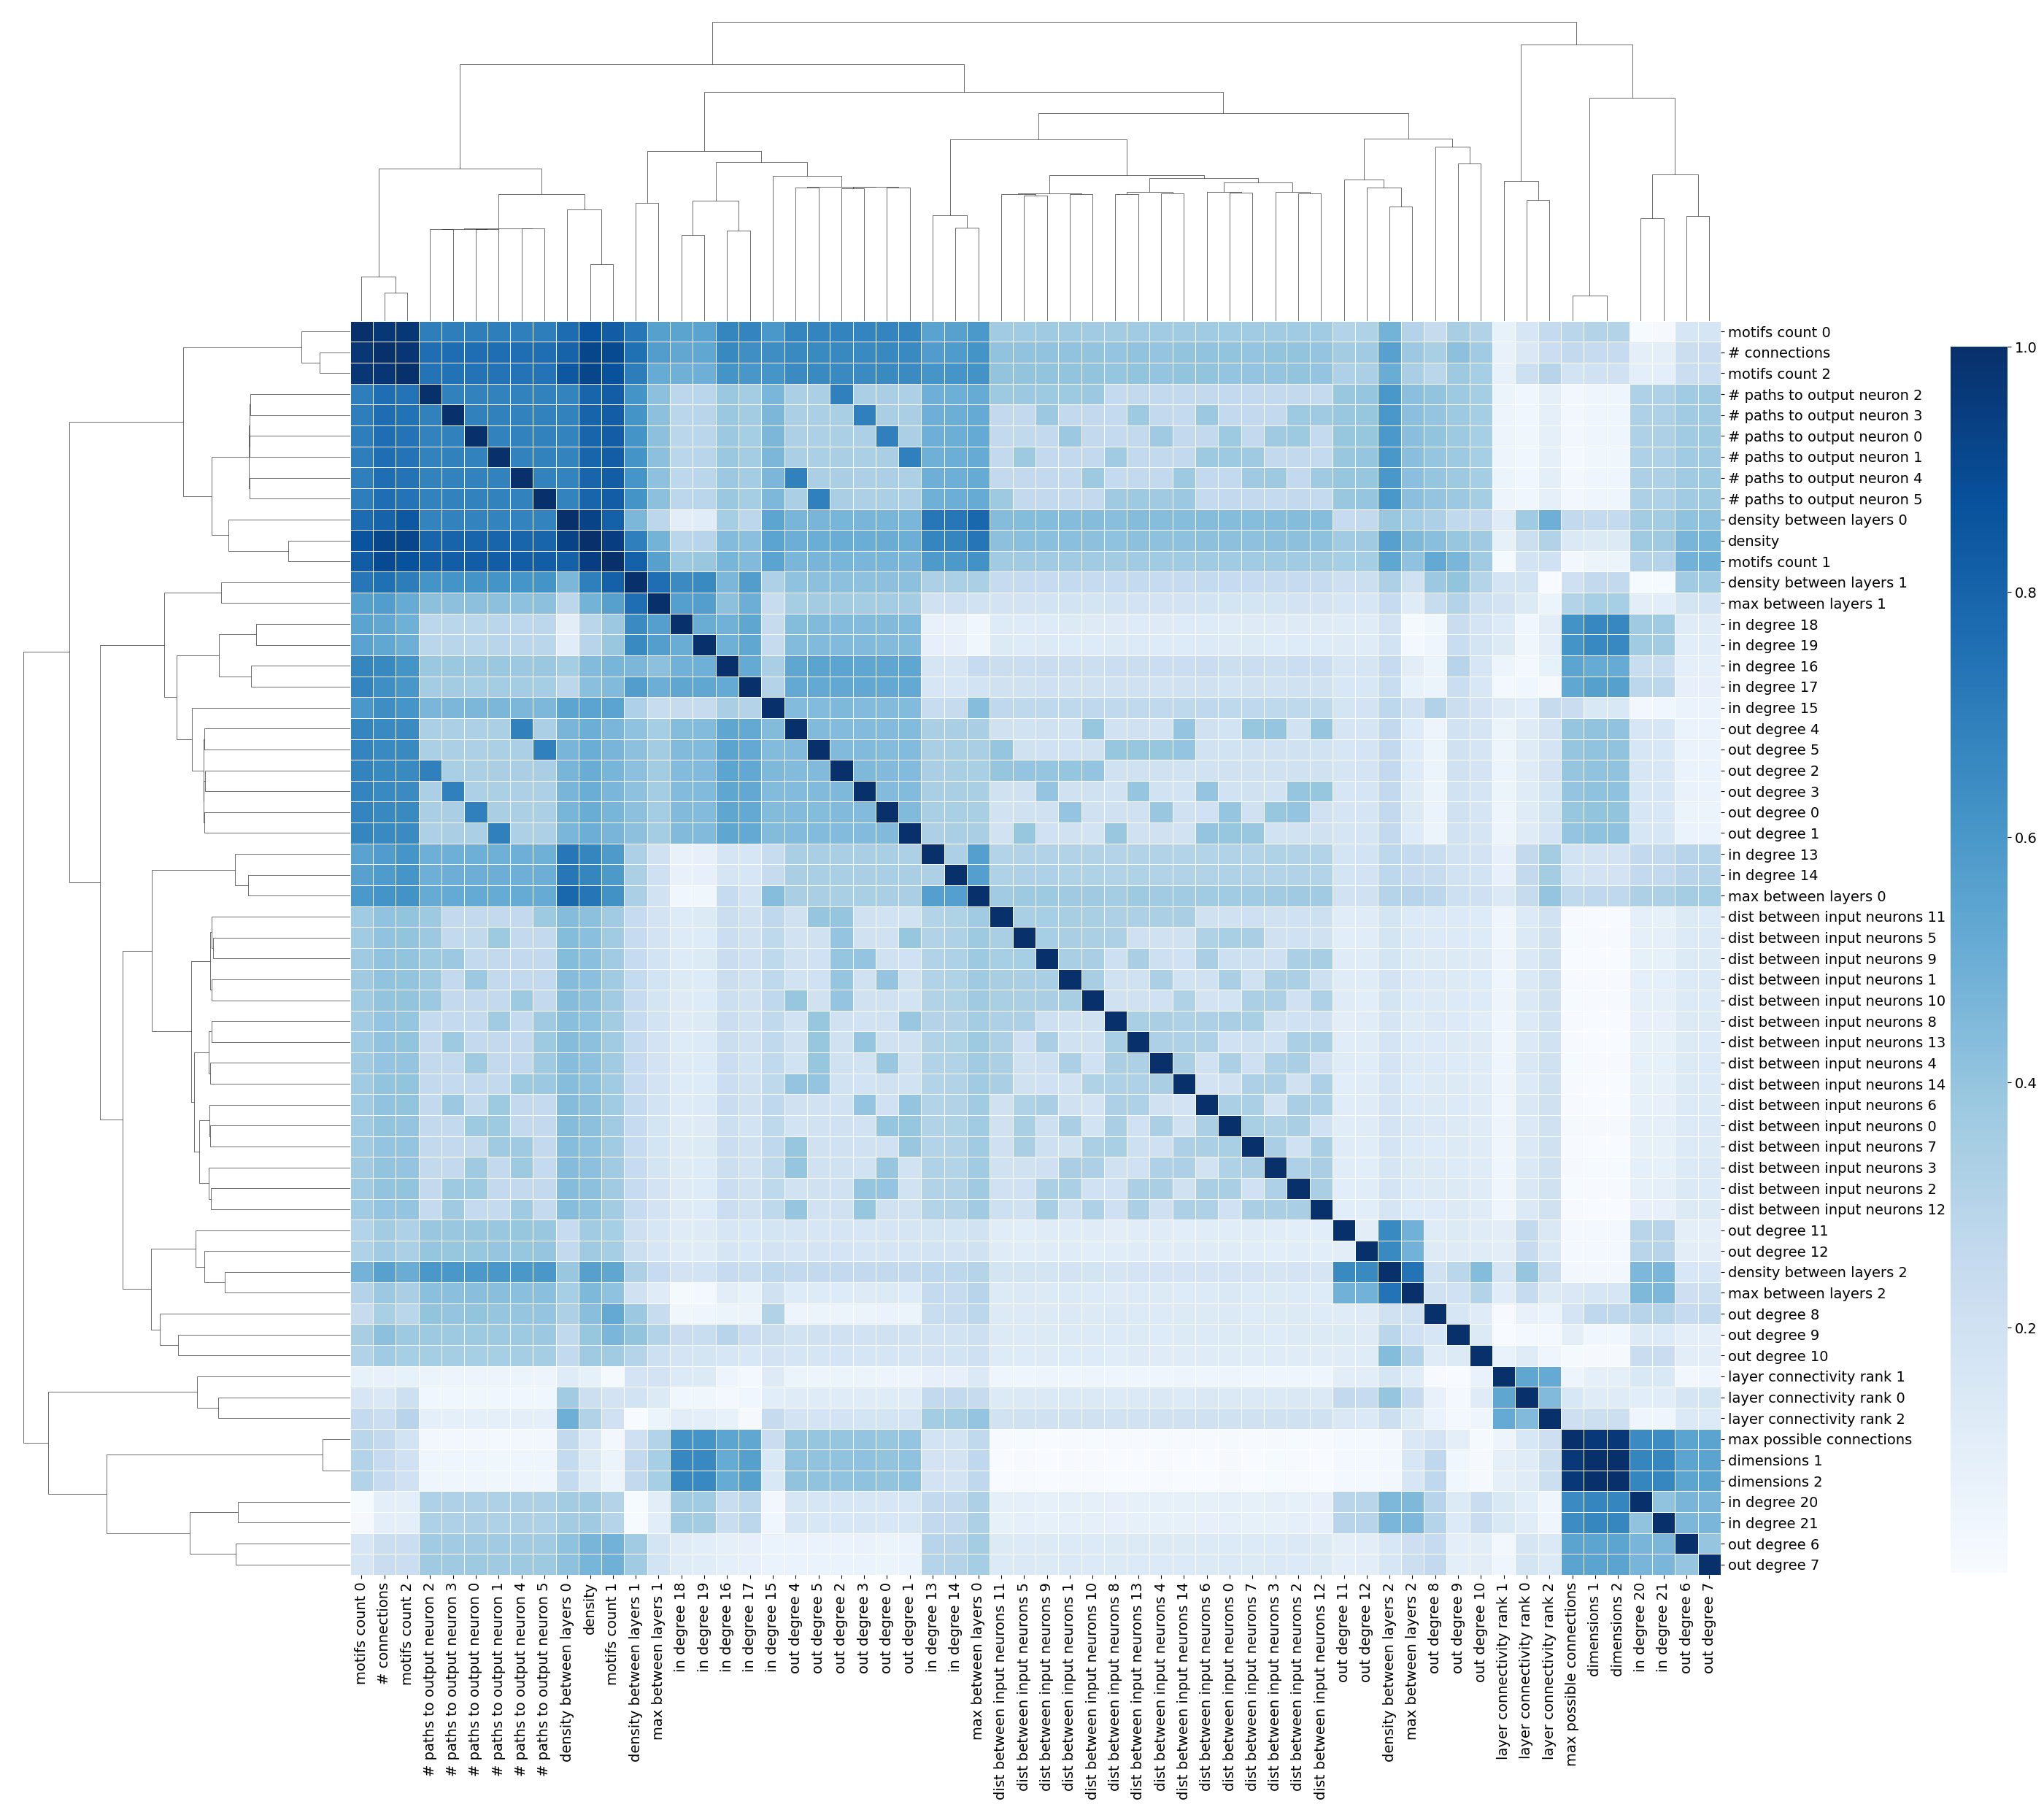

<Figure size 2600x2400 with 0 Axes>

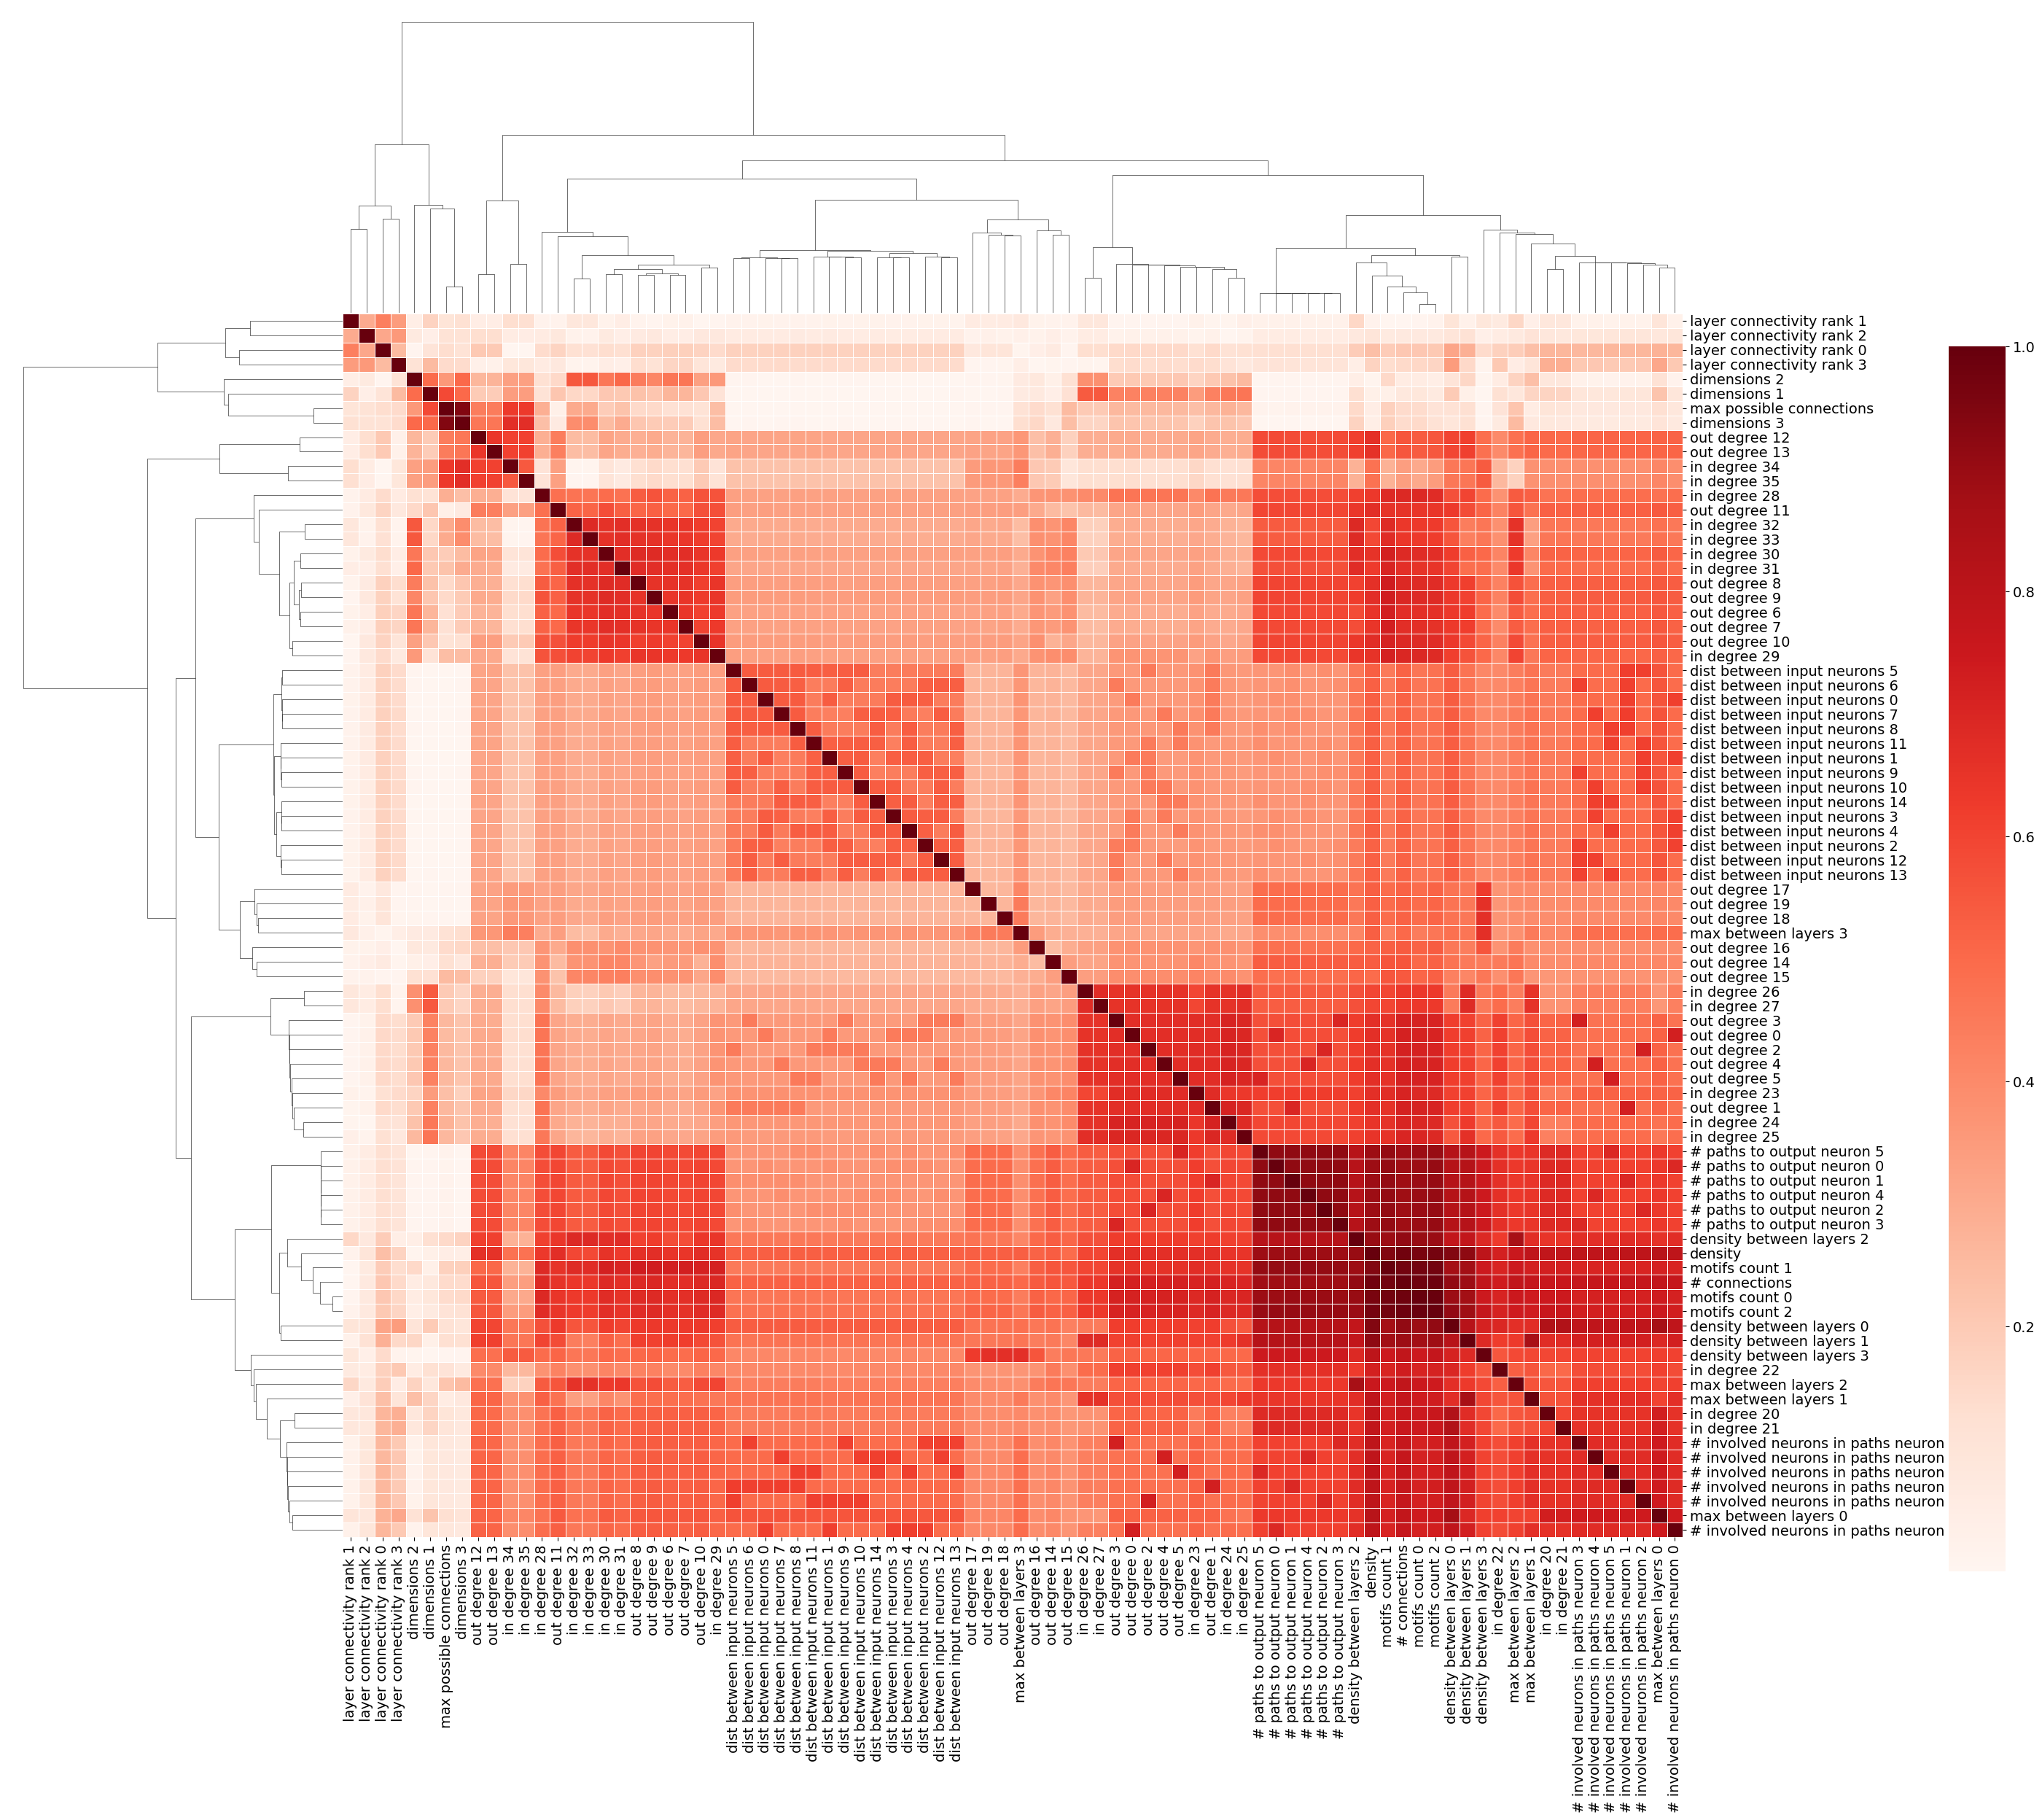

/opt/anaconda3/envs/network_modularity_new/lib/python3.9/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 2600x2400 with 0 Axes>

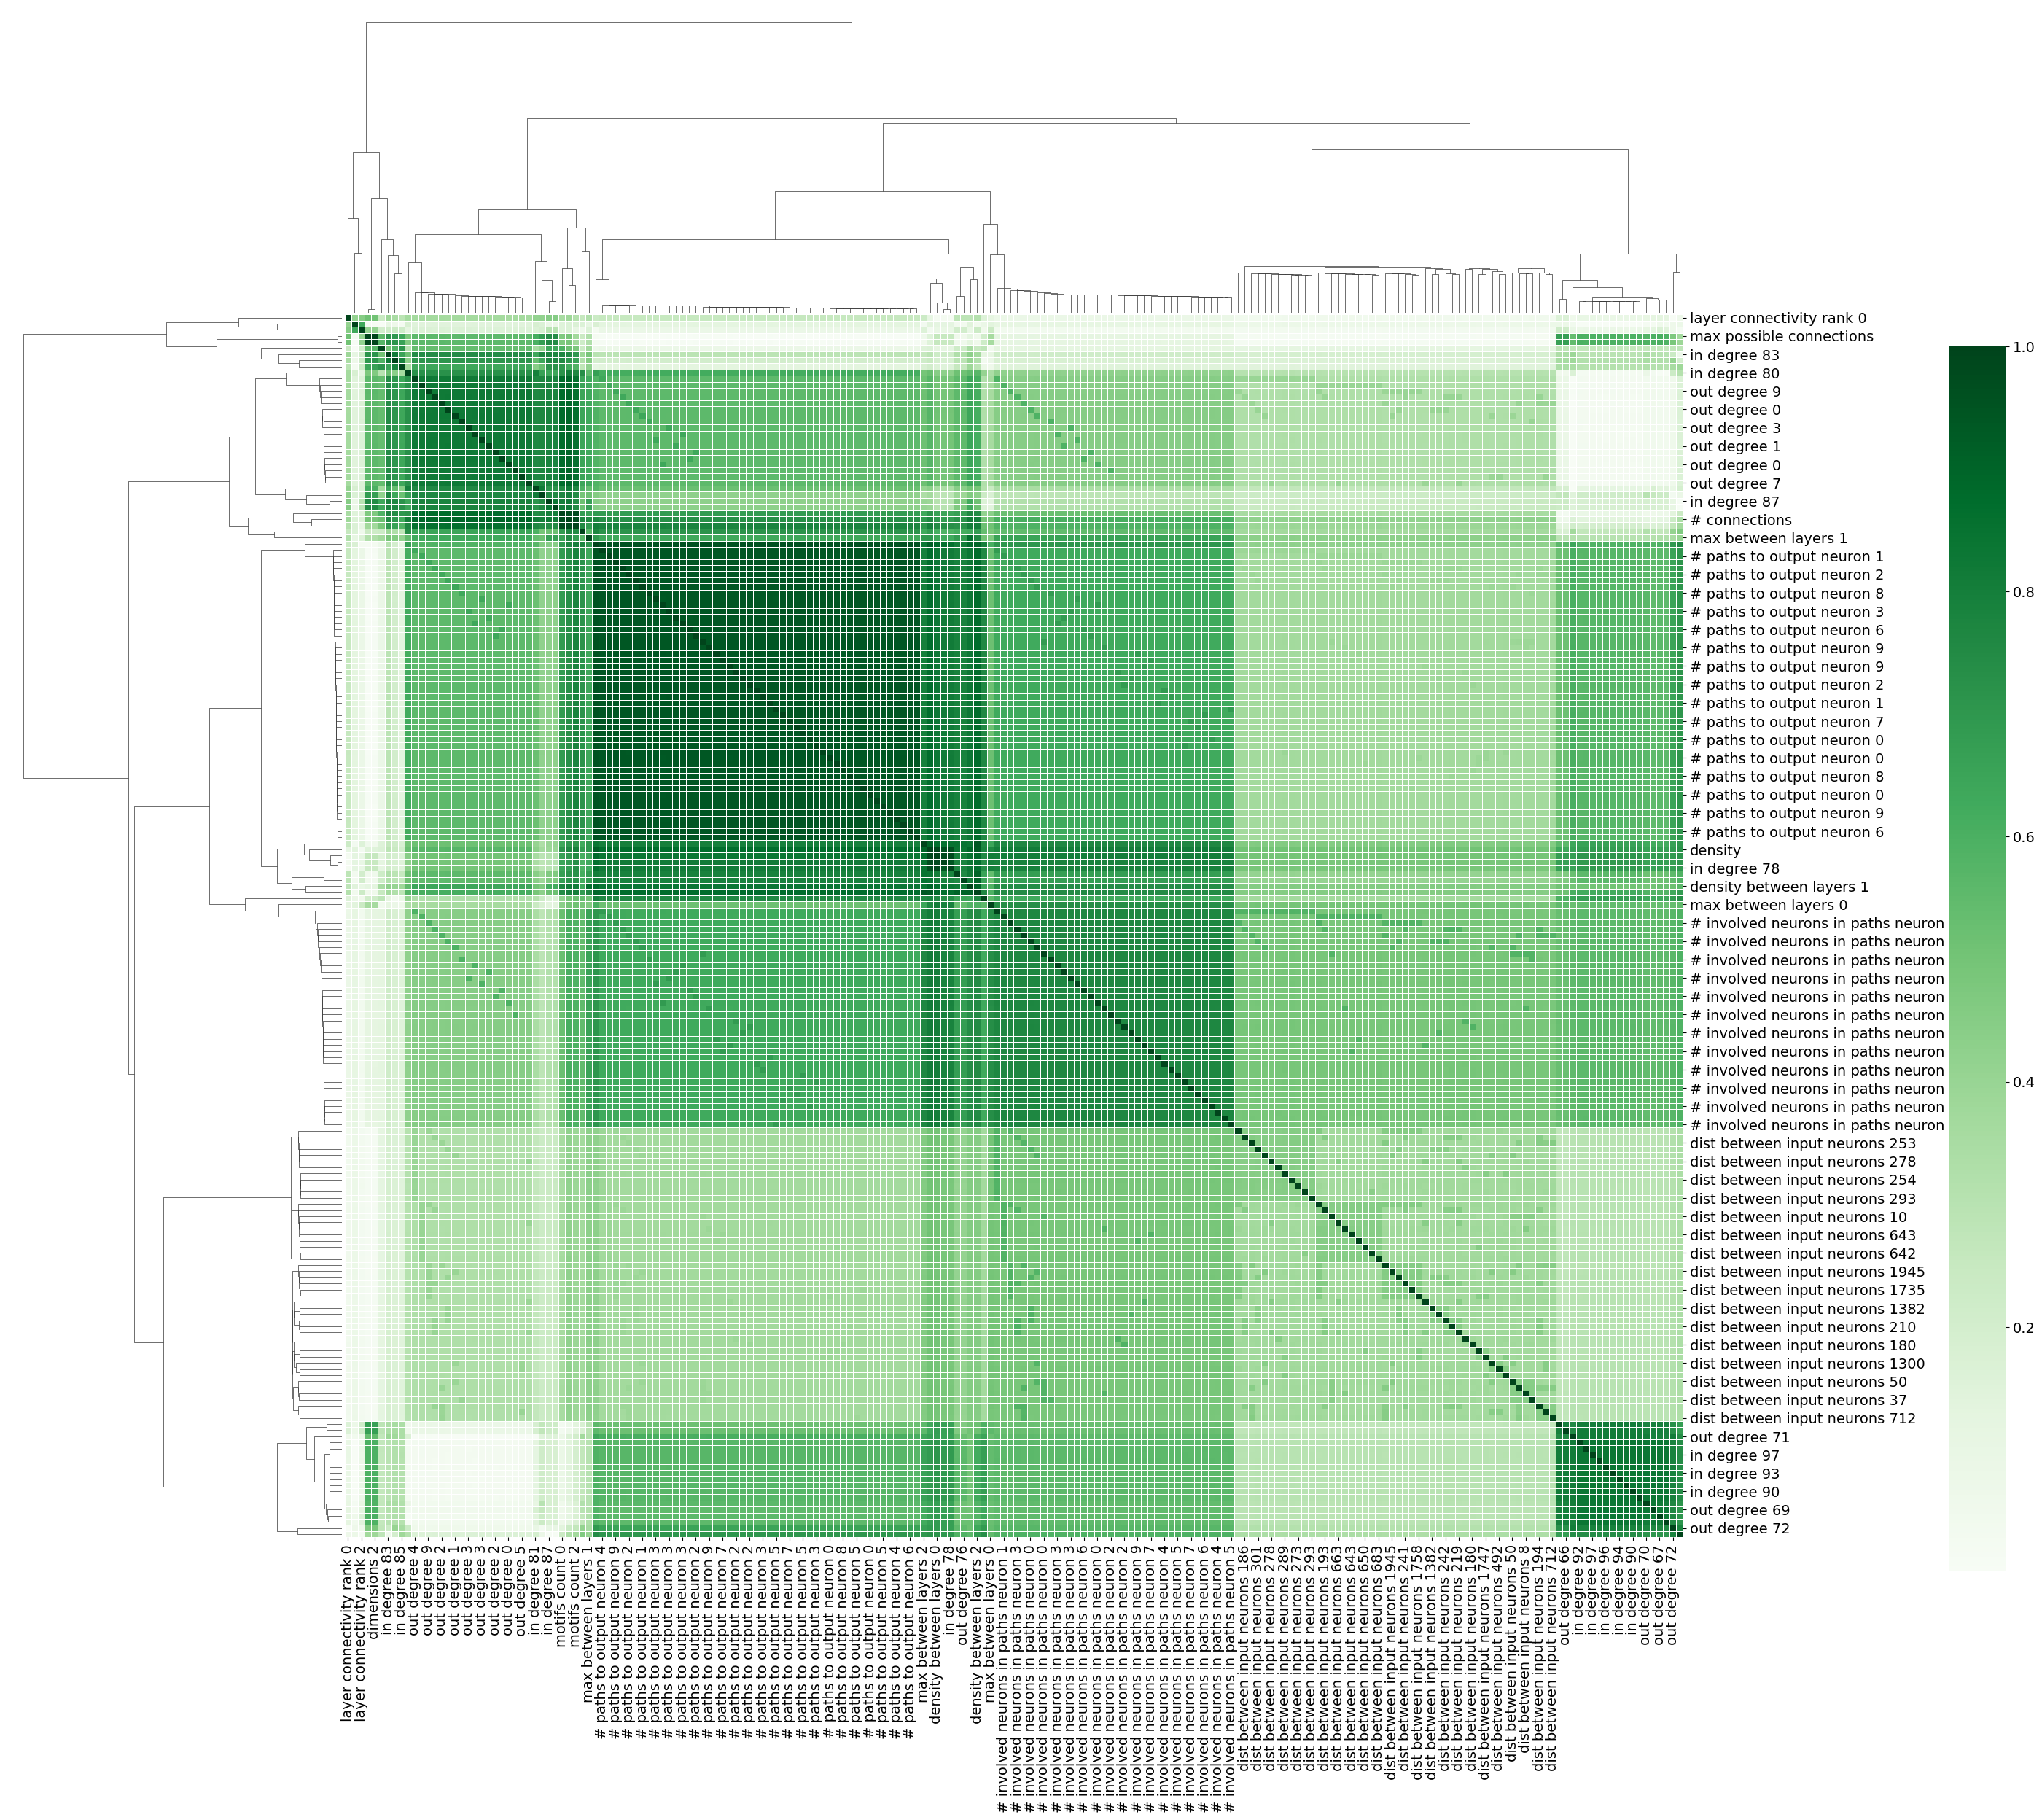

In [50]:
for i, (correlated_features, name, col, max_) in enumerate(zip(
        [retina_correlated_features, xor_correlated_features, dig_correlated_features],
        ['Retina', 'XOR', 'Digit recognition'],
        ["Blues", "Reds", "Greens"],
        [5, 5, 64]
)):
    all_ticks = []
    for feature_full_name in correlated_features.columns:
        feature_full_name = feature_full_name.replace('total_connectivity_ratio_between_layers',
                                                      'density_between_layers')
        feature_full_name = feature_full_name.replace('max_connectivity_between_layers_per_layer', 'max_between_layers')
        feature_full_name = feature_full_name.replace('connectivity_ratio', 'density')
        feature_full_name = feature_full_name.replace('connectivity_ratio', 'density')
        feature_full_name = feature_full_name.replace('num', '#')
        feature_full_name = feature_full_name.replace('distances_between_input_neuron', 'dist_between_input_neurons')
        if 'per_inpu' in feature_full_name:
            feature_full_name = feature_full_name.split('per_inpu')[0] + 'neuron ' + feature_full_name[-2]
        if 'connections_per' in feature_full_name:
            n = int(feature_full_name.rstrip(' ')[-2])
            if 'connections_per_layer_(0' in feature_full_name:
                max_n = max_
                feature_full_name = feature_full_name.split('(0')[0] + str(n)
            else:
                for j in ('1', '2', '3', '4'):
                    if f'connections_per_layer_({j}' in feature_full_name:
                        feature_full_name = feature_full_name.split(f'({j}')[0] + str(max_n + 1)
                max_n += 1
            feature_full_name = feature_full_name.replace('out_connections_per_layer', 'out_degree')
            feature_full_name = feature_full_name.replace('in_connections_per_layer', 'in_degree')
        all_ticks.append(feature_full_name.replace('_', ' '))
    plt.figure(figsize=(26, 24))
    c = sns.color_palette(col, as_cmap=True)
    correlated_features_new_name = correlated_features.copy()
    correlated_features_new_name.columns = all_ticks
    correlated_features_new_name.index = all_ticks
    s = sns.clustermap(correlated_features_new_name, linewidth=0.5, cmap=c, cbar_pos=(1.03, 0.1, 0.03, 0.7,),
                       figsize=(26, 24))
    s.tick_params(axis='both', labelsize=14)
    s.savefig(
        f"{plot_path}/{time_str}_{name}_feature_correlation_with_clustering.png",  bbox_inches='tight')
    plt.show()






In [131]:
for cor_f, t in zip([retina_correlated_features, xor_correlated_features, dig_correlated_features], ['r', 'x', 'd']):
    print(t)
    c = np.tril(cor_f, k=-1)
    cols = list(cor_f.columns)
    rows, columns = np.where(c >= 0.94)
    for i, j in zip(rows, columns):
        print(cols[i.item()], cols[j.item()], round(c[i, j], 3))

r
motifs_count_0 num_connections 0.97
motifs_count_1 connectivity_ratio 0.943
motifs_count_2 num_connections 0.976
motifs_count_2 motifs_count_0 0.97
dimensions_1 max_possible_connections 0.967
dimensions_2 max_possible_connections 0.967
dimensions_2 dimensions_1 1.0
x
num_connections connectivity_ratio 0.979
total_connectivity_ratio_between_layers_0 connectivity_ratio 0.942
motifs_count_0 connectivity_ratio 0.962
motifs_count_0 num_connections 0.983
motifs_count_1 connectivity_ratio 0.945
motifs_count_1 num_connections 0.976
motifs_count_1 motifs_count_0 0.976
motifs_count_2 connectivity_ratio 0.971
motifs_count_2 num_connections 0.985
motifs_count_2 motifs_count_0 0.992
motifs_count_2 motifs_count_1 0.975
dimensions_3 max_possible_connections 0.942
d
in_connections_per_layer_(1_ 0)  connectivity_ratio 0.967
in_connections_per_layer_(1_ 1)  connectivity_ratio 0.967
in_connections_per_layer_(1_ 1)  in_connections_per_layer_(1_ 0)  0.944
total_connectivity_ratio_between_layers_0 connect

In [135]:
for cor_f, t in zip([retina_correlated_features, xor_correlated_features, dig_correlated_features], ['r', 'x', 'd']):
    print(t)
    print(round(cor_f['motifs_count_0']['num_connections'], 3))
    print(round(cor_f['motifs_count_1']['num_connections'], 3))
    print(round(cor_f['motifs_count_2']['num_connections'], 3))

r
0.97
0.901
0.976
x
0.983
0.976
0.985
d
0.968
0.768
0.975


In [ ]:
for cor_f, t in zip([retina_correlated_features, xor_correlated_features, dig_correlated_features], ['r', 'x', 'd']):
    print(t)
    print(round(cor_f['motifs_count_0']['connectivity_ratio'], 3))
    print(round(cor_f['motifs_count_1']['connectivity_ratio'], 3))
    print(round(cor_f['motifs_count_2']['connectivity_ratio'], 3))

In [35]:
corr_array = np.array(dig_correlated_features)
for feature_idx in selected_features_idxs:
    print(len(np.where(corr_array[feature_idx] >= np.quantile(corr_array, 0.95))[0]))

2
2
49
